# **Final Project** | **Loan Approval**

In [1]:
import pandas as pd
import numpy as np
import datetime

#graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#warnings
import warnings
warnings.filterwarnings("ignore")

import os

## EDA 

In [2]:
data=pd.read_csv('Data/loan_approval_dataset.csv')

In [3]:
data.head(3)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
#data.shape

In [6]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### Nulls & Duplicates

In [7]:
data.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [8]:
sum(data.isna().sum())

0

In [9]:
data.duplicated().sum()

0

There are no nulls nor duplicates in the dataset. So it looks quite clean for now. I will keep the exploration

It looks like the columns are not following PEP 8

In [10]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

I created a function in functions.py that removes spaces of each title column

In [11]:
from functions import remove_spaces
remove_spaces(data)
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

Now we will make a series of graphs to continue with the exploration and start to get some insights of the data

Distribution of Loan Satus

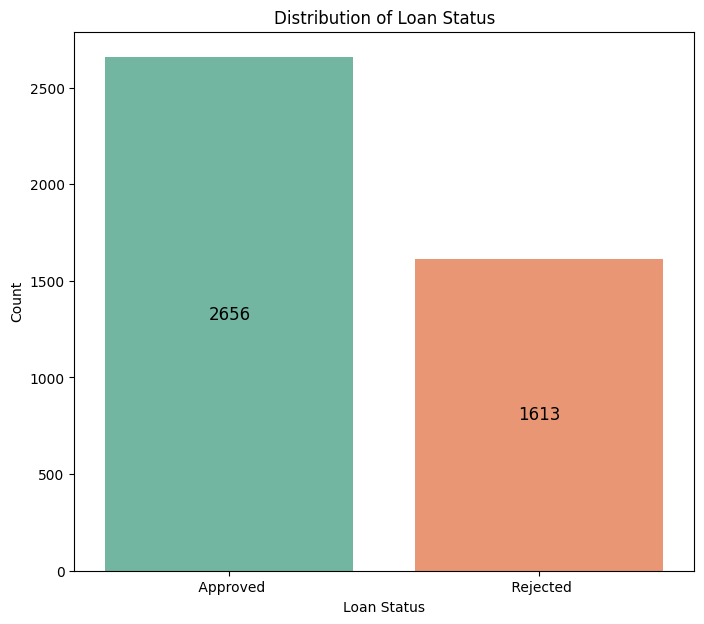

In [12]:
plt.figure(figsize=(8, 7))
ax = sns.countplot(x='loan_status', data=data, palette='Set2')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                ha='center', va='center', 
                xytext=(0, 0), 
                textcoords='offset points',
                color='black',  
                fontsize=12)  

plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

os.makedirs('Images', exist_ok=True)
#plt.savefig('Images/distribution_loan_status.png', bbox_inches='tight', dpi=300)

plt.show()

Loan Status is quite an important variable in this dataframe. After all, when a person goes to the bank to apply for a loan,
the employee that is attending the client has to take an important decision: if he approves the loan or not

In [13]:
data.loan_status.value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In this case we can see that much more loans were approved than rejected. This implies that a decent amount of clientes are meeting the
recquirement critirea. Besides, maybe the bank has low demands

Now let's look at some of the variables que bank takes into account in order to make the decision of approval or rejection

Education Distribution

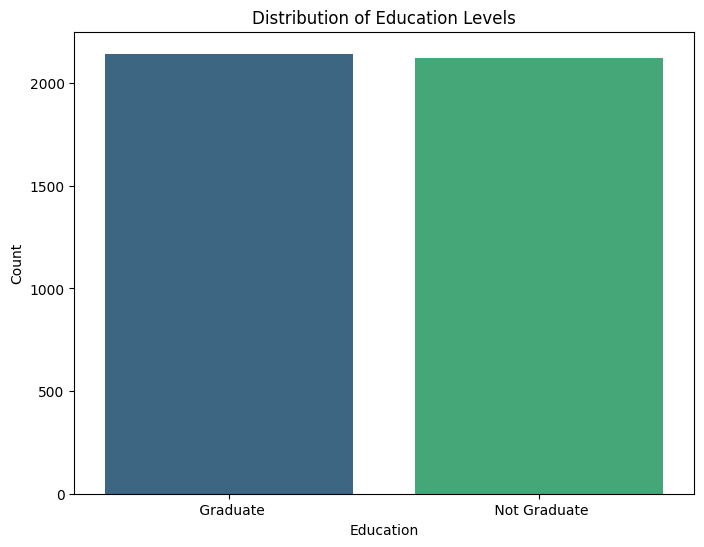

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='education', data=data, palette='viridis')
plt.title('Distribution of Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

In [15]:
data.education.value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In this case, both categories are quite balanced. Meaning that the likelihood that someone who comes into the bank for a loan
application of being graduate, is almost the same as not being graduate. So probably this variable will not be so relevant in future analysis

Number of Dependents Distribution

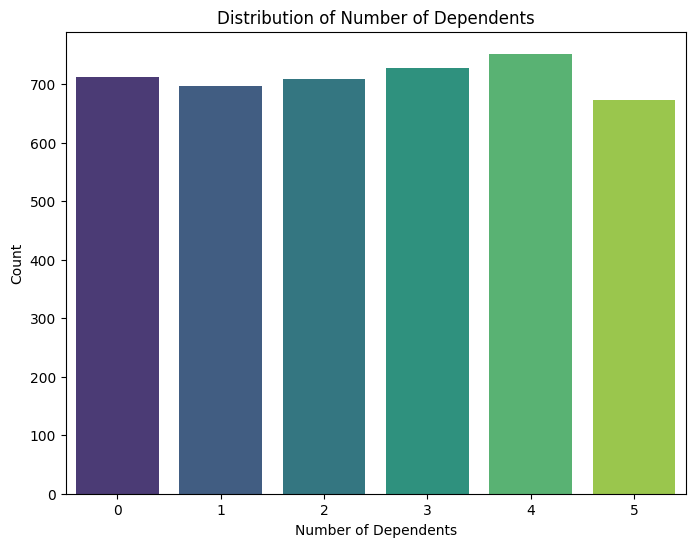

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='no_of_dependents', data=data, palette='viridis')
plt.title('Distribution of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()

This one is also quite balanced. This variable is important for banks because clientes with a high number of dependents will be more likely to 
default on their loans.

In [17]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

Scatter Plot: Loan Amount vs Annual Income

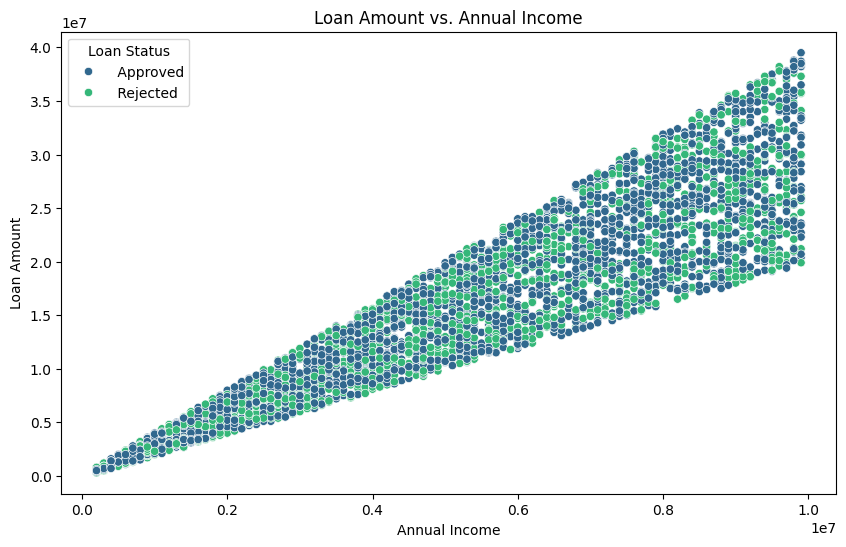

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income_annum', y='loan_amount', hue='loan_status', data=data, palette='viridis')
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

The previous graph is really interesting. Besides the fact the we can see that the higher the income, the higher the loan amount. The higher the
income, the higher the probability that the loan will be approved. At first it may not so intuitive becasue eventhough people with high incomes
are more reliable to the bank, they ask for hight loan amounts. However, I believe the ratio of loan approvals at high income is higher because 
reliability of the clients is quite an important aspect. Moreover, in general clientes with have income have a positive history with banks.
They also have assets in general, that the bank can take if they don't finish paying 

Let's define numerical and categorical data

In [19]:
numericals=data.select_dtypes(include=np.number)
categoricals=data.select_dtypes(include='object')

The next graph we are going to look is about the loan amount and the anual income by number of dependents

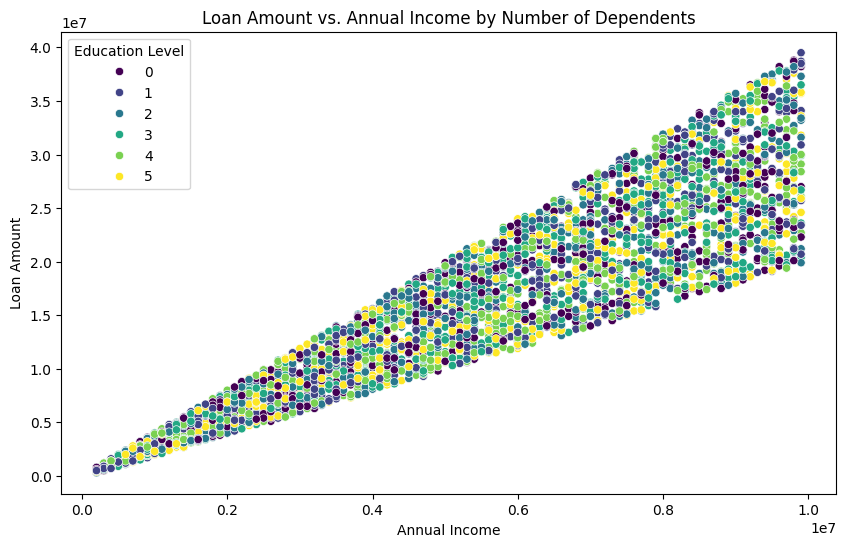

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income_annum', y='loan_amount', hue='no_of_dependents', data=data, palette='viridis')
plt.title('Loan Amount vs. Annual Income by Number of Dependents')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend(title='Education Level')
plt.show()

It looks like the number of dependents is quite distributed across the different levels of Income. I believe it is quite interesting that
they move in the same way

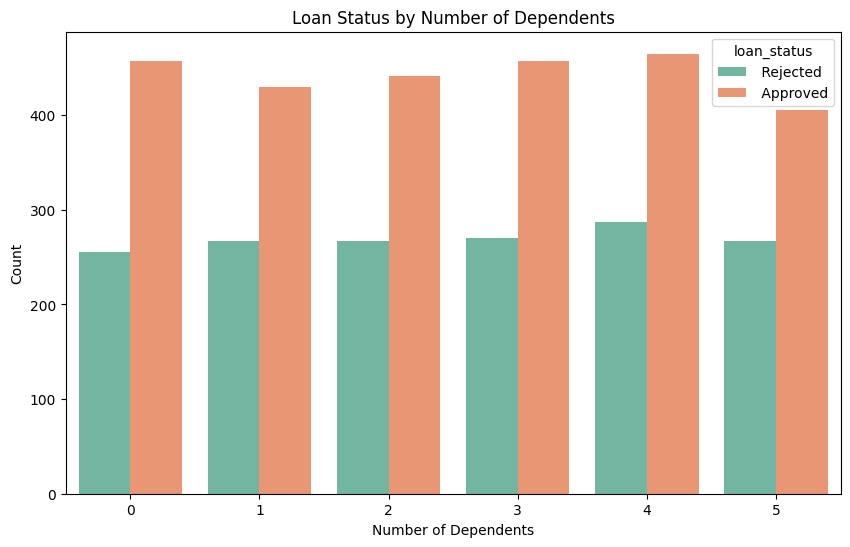

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='no_of_dependents', hue='loan_status', data=data, palette='Set2')
plt.title('Loan Status by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()

It is clear that the number of dependents does not affect the loan status that much. However it is a variable that can affect the loan amount,
or other variables so there is no need to drop it for now

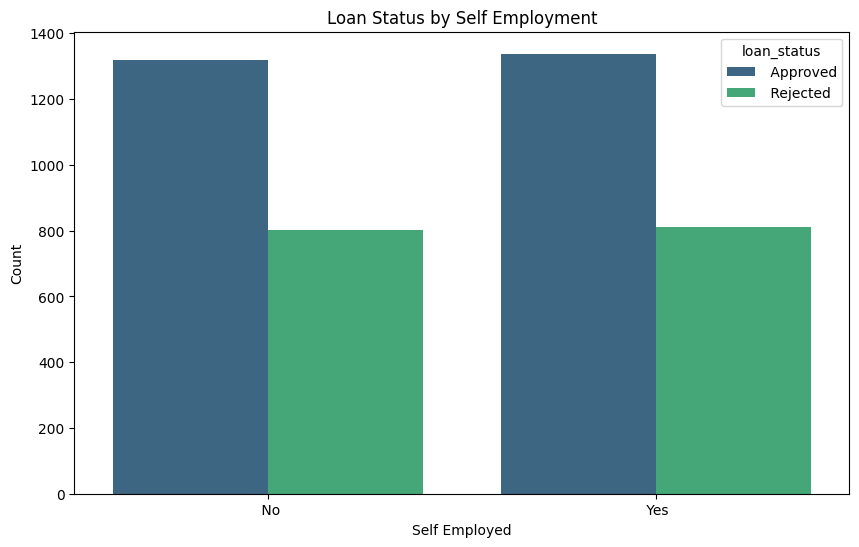

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='self_employed', hue='loan_status', data=data, palette='viridis')
plt.title('Loan Status by Self Employment')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.show()

The same observations from the previous graph apply in this one

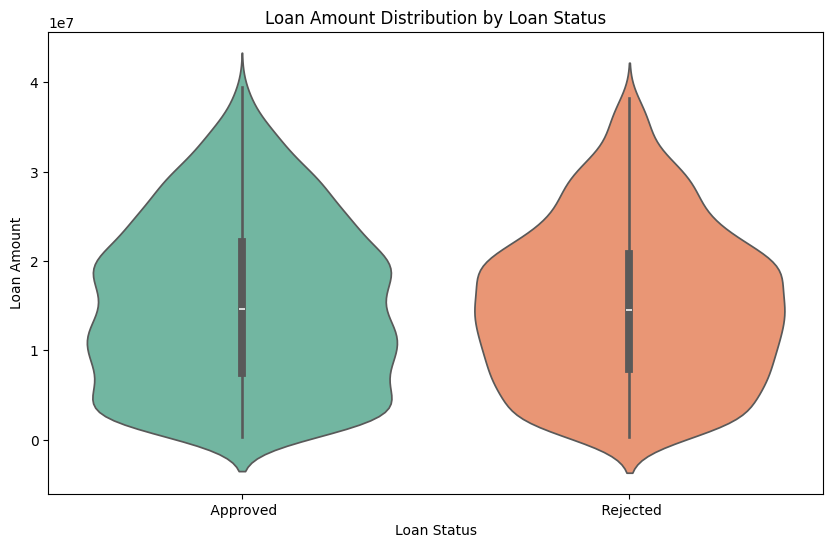

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan_status', y='loan_amount', data=data, palette='Set2')
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

Catplot 

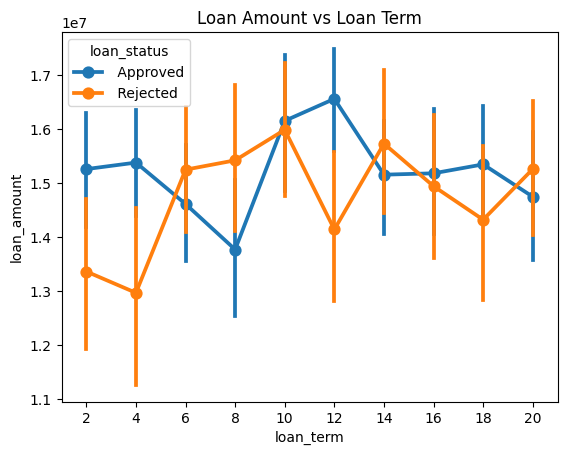

In [24]:
sns.pointplot(x='loan_term', y='loan_amount', hue='loan_status', data=data)
plt.title('Loan Amount vs Loan Term')
plt.show()

We can see that the distribution does not change that much as que loan term increases. So, for predicting loan amount, loan term 
probabibly will not be a decisive feature. The following graph will explain the same idea but using a boxplot instead. Maybe it is easier
to understand, dependes on the viewer

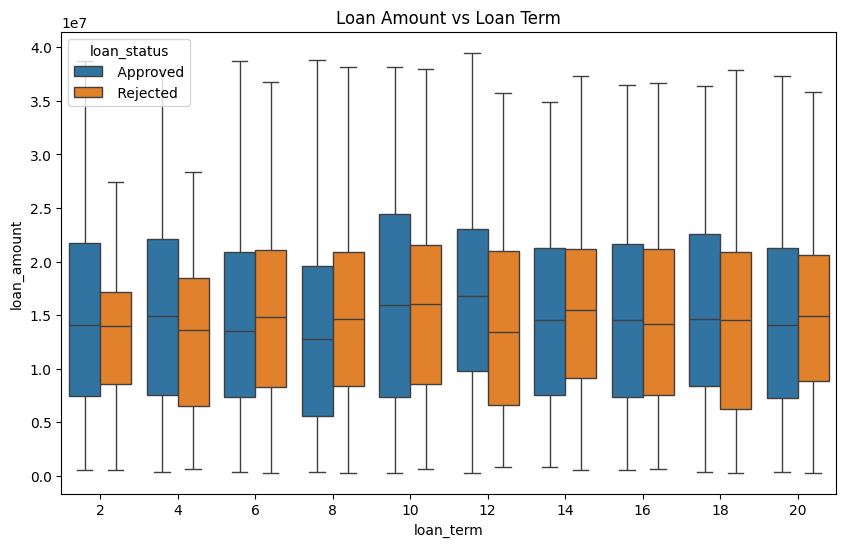

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_term', y='loan_amount', hue='loan_status', data=data)
plt.title('Loan Amount vs Loan Term')
plt.show()

Heatmap

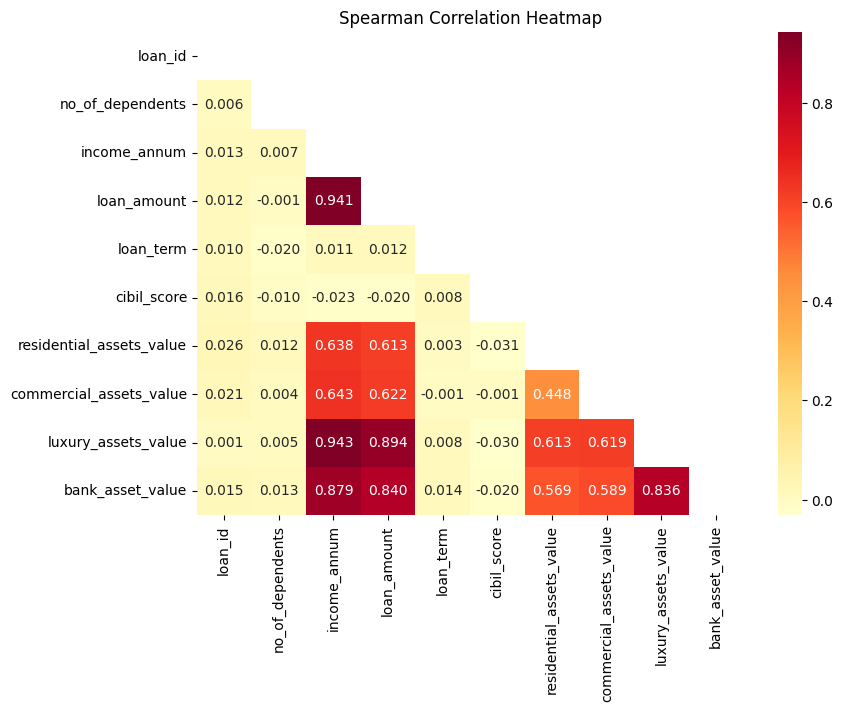

In [26]:
correlation_matrix=numericals.corr(method="spearman")
mask=np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrRd", fmt=".3f", mask=mask)
plt.tight_layout() 
plt.title("Spearman Correlation Heatmap")
#plt.savefig('Images/heatmap', bbox_inches='tight')


plt.show()

The Heatmap shows a wide range of correlations. Some are almost 0 and some are almost 1. Depending on the analysis that will be done later, we
will decide which variables we want to keep, also taking into account the VIF values

Lineplot

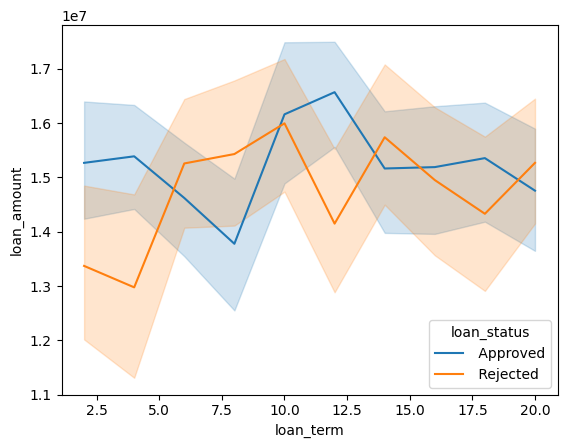

In [27]:
sns.lineplot(x='loan_term', y='loan_amount', hue='loan_status', data=data)
plt.show()

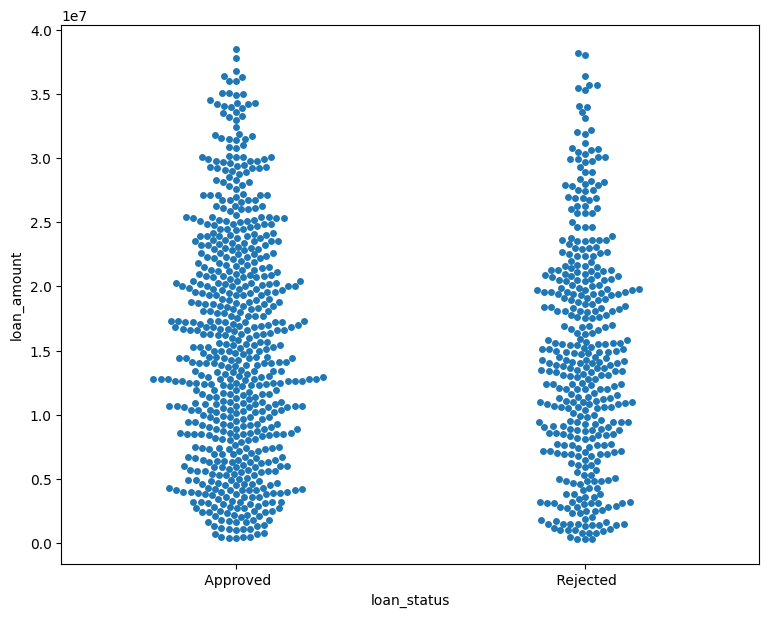

In [28]:
plt.figure(figsize=(9, 7))
sampled_data = data.sample(n=1000)  
sns.swarmplot(x='loan_status', y='loan_amount', data=sampled_data)
plt.show()

Boxplots to visualize outliers

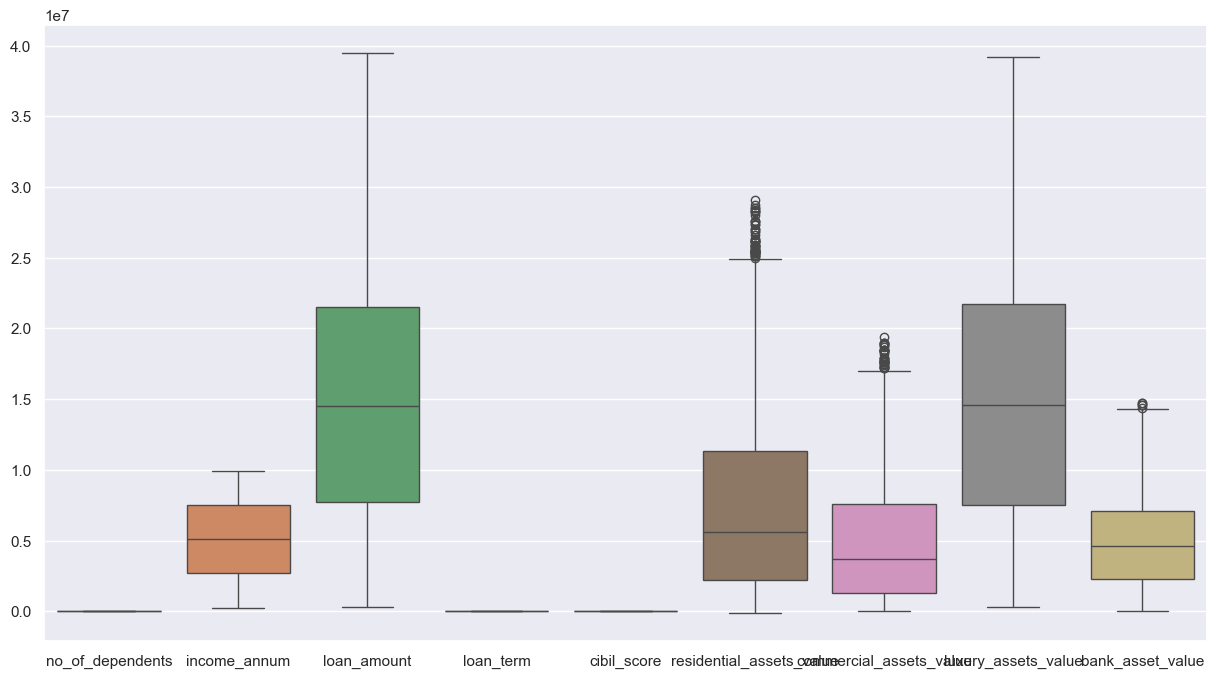

In [42]:
#Without loan_id
data_cleaned = data.drop(columns=['loan_id'])

sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(data=data_cleaned)
plt.savefig('Images/boxplots.png', bbox_inches='tight', dpi=300)
plt.show()

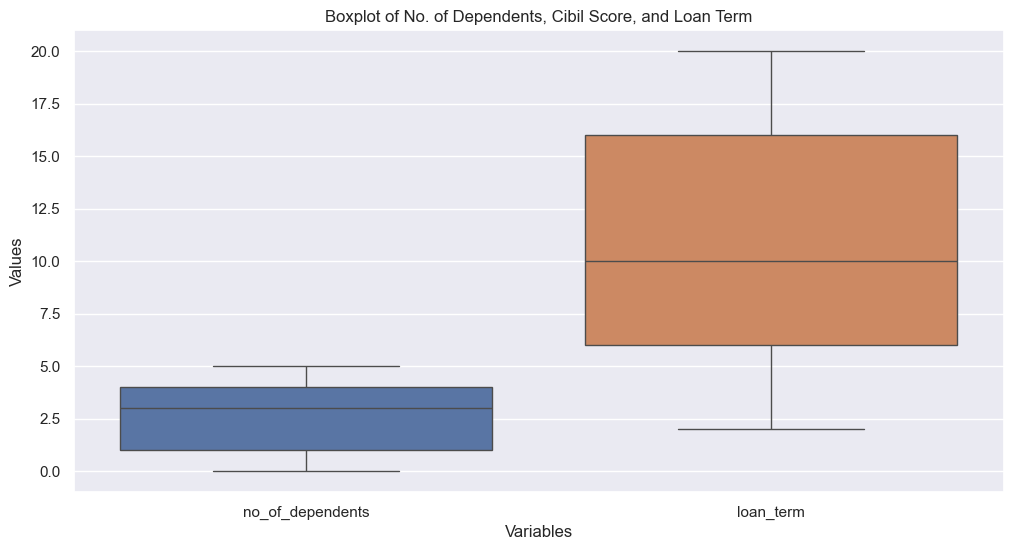

In [43]:
data_subset = data[['no_of_dependents', 'loan_term']]

sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(data=data_subset)
plt.title('Boxplot of No. of Dependents, Cibil Score, and Loan Term')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.savefig('Images/boxplots.png', bbox_inches='tight', dpi=300)
plt.show()

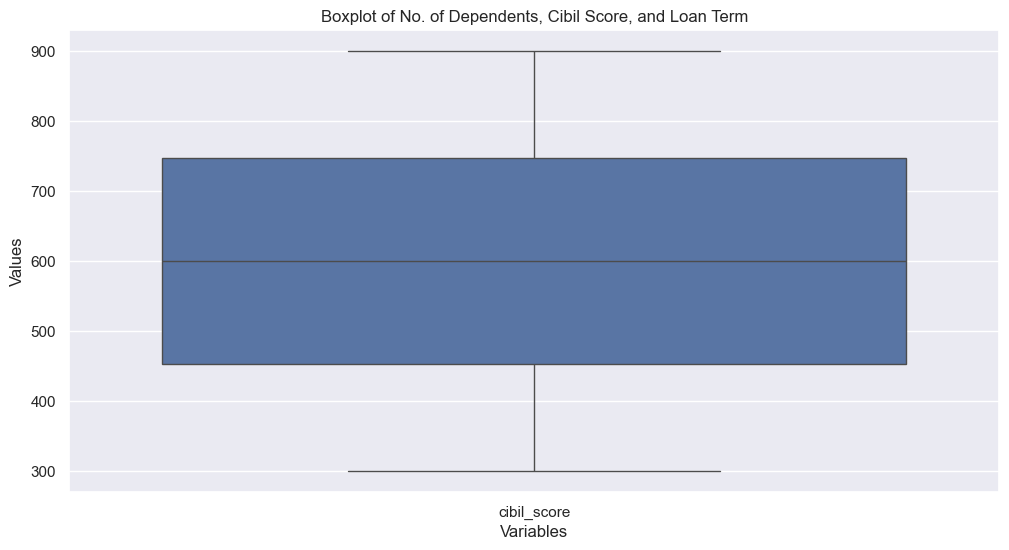

In [41]:
data_subset = data[[ 'cibil_score']]

sns.set(rc={'figure.figsize':(12,6)})

sns.boxplot(data=data_subset)

plt.title('Boxplot of No. of Dependents, Cibil Score, and Loan Term')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.savefig('Images/boxplots_cibil.png', bbox_inches='tight', dpi=300)
plt.show()


In [34]:
data.income_annum.value_counts()

income_annum
7000000    62
4100000    59
7600000    57
4700000    56
6900000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name: count, Length: 98, dtype: int64

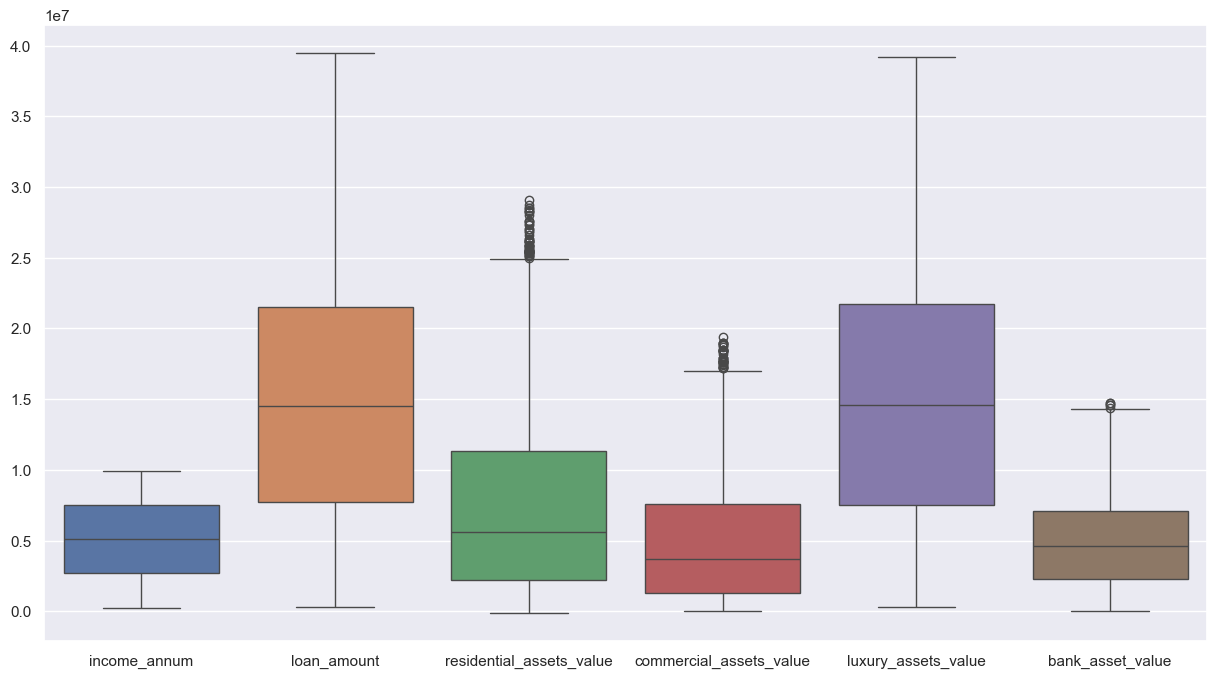

In [30]:
# Outliers
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(data[['income_annum', 'loan_amount', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']] )
plt.savefig('Images/boxplots.png', bbox_inches='tight', dpi=300)

Looking at the plots, we can see that some variables like 'comercial_asset_value' have a lot of skewness and outliers. Those two chatacteristics
can also be observed from the other plots. But for the moment, we will not go into details with these plots (I didn't include 'cibil_score','loan_term','no_of_dependents' in the previous, because their graphs practically don't exit. In order to make the plot more asthetic)

In [31]:
numericals.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

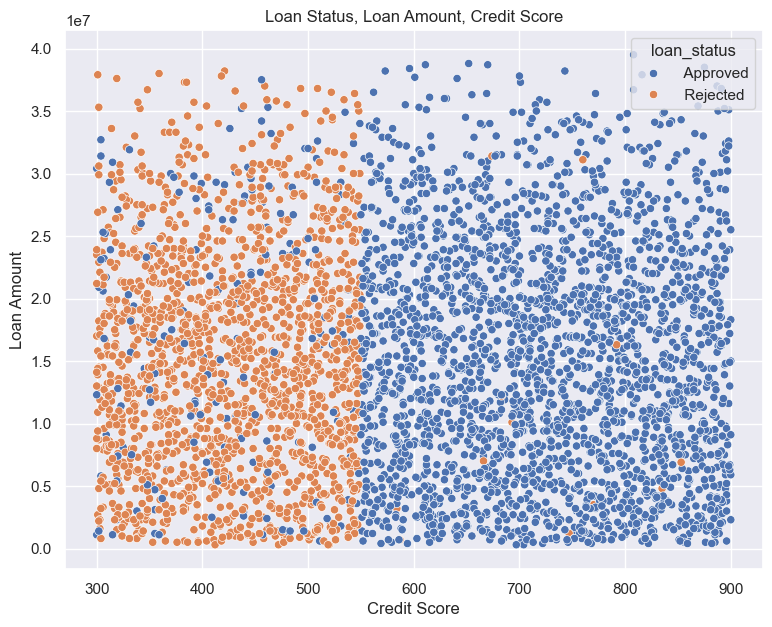

In [32]:
plt.figure(figsize=(9, 7)) 
sns.scatterplot(x=data['cibil_score'], y=data['loan_amount'], hue=data['loan_status'])

plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

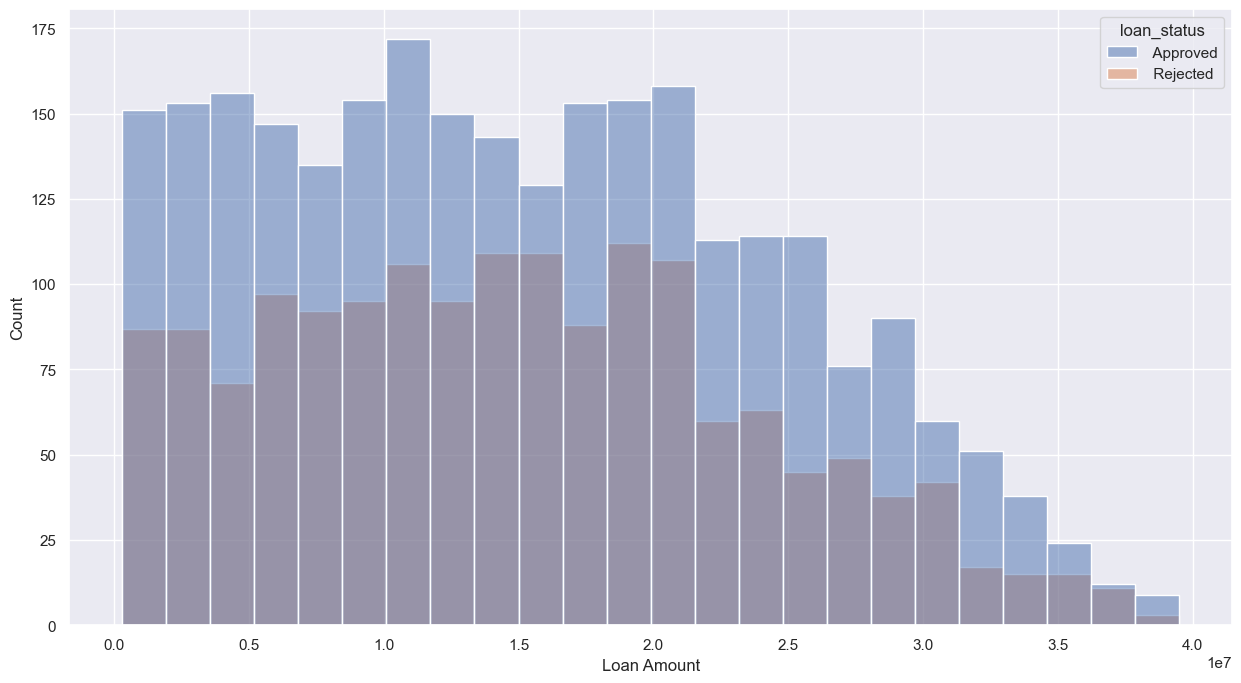

In [34]:
sns.histplot(data, x='loan_amount', hue='loan_status')
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

All in all, the dataset was clean, but it has many interesting features that could be interesting to analize using Machine Learning, as
we will see in the next Notebook